In [10]:
"""
Comparing images using ORB/SIFT feature detectors
and structural similarity index. 
@author: Sreenivas Bhattiprolu
"""

'\nComparing images using ORB/SIFT feature detectors\nand structural similarity index. \n@author: Sreenivas Bhattiprolu\n'

In [11]:
from skimage.metrics import structural_similarity
import cv2
import os

In [12]:
#Works well with images of different dimensions
def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    
  #perform matches. 
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 70]  

  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)

In [13]:
#Needs images to be same dimensions
def structural_sim(img1, img2):

  sim, diff = structural_similarity(img1, img2, full=True)
  return sim

In [14]:
os.getcwd()

'D:\\Facial-Landmark-Detection\\similarity_test'

In [15]:
folder_path = 'D:\Facial-Landmark-Detection\similarity_test'
os.chdir(folder_path)
os.listdir(folder_path)

['17_1_0.jpg',
 '17_1_1.jpg',
 '17_2_0.jpg',
 '17_3_0.jpg',
 '17_3_1.jpg',
 '17_3_2.jpg',
 '17_3_3.jpg']

In [16]:
os.getcwd()

'D:\\Facial-Landmark-Detection\\similarity_test'

In [17]:
os.listdir(folder_path)[0]

'17_1_0.jpg'

<ipython-input-40-df55ce7db7ea>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


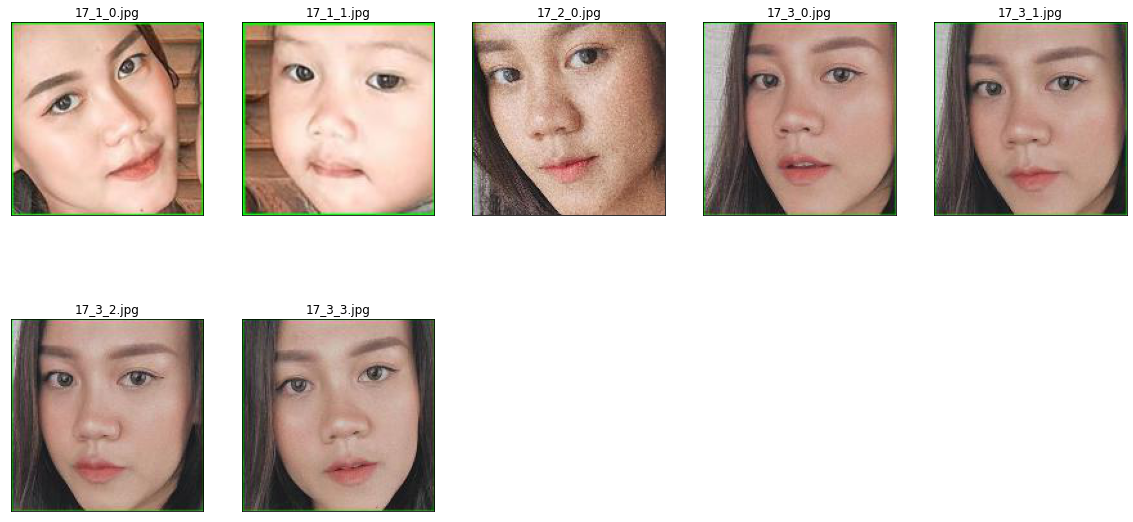

In [40]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in os.listdir(folder_path):
    images.append(mpimg.imread(os.path.join(folder_path,img_path)))

plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.title(os.listdir(folder_path)[i])


In [18]:
for im in os.listdir(folder_path): 
    im_ref = os.listdir(folder_path)[0]
    im_ref_load = cv2.imread(os.path.join(folder_path, im_ref))
    image_load = cv2.imread(os.path.join(folder_path, im))
    #1.0 means identical. Lower = not similar
    orb_similarity = orb_sim(im_ref_load, image_load)
    print("ORB Similarity "+ "for " + im_ref + " and " + im + " is: " , orb_similarity)
    # ssim = structural_sim(im_ref_load, image_load) 
    # print("Similarity using SSIM is: ", ssim)



ORB Similarity for 17_1_0.jpg and 17_1_0.jpg is:  1.0
ORB Similarity for 17_1_0.jpg and 17_1_1.jpg is:  0.8181818181818182
ORB Similarity for 17_1_0.jpg and 17_2_0.jpg is:  0.9142857142857143
ORB Similarity for 17_1_0.jpg and 17_3_0.jpg is:  0.8695652173913043
ORB Similarity for 17_1_0.jpg and 17_3_1.jpg is:  0.896551724137931
ORB Similarity for 17_1_0.jpg and 17_3_2.jpg is:  0.9428571428571428
ORB Similarity for 17_1_0.jpg and 17_3_3.jpg is:  0.9615384615384616
